In [1]:
import requests
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

## Oberservando o dataframe

In [3]:
df = pd.read_csv('ml_project1_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#Dataframe auxiliar na análise
df_aux = pd.DataFrame({'Type': df.dtypes,
                      'Missing': df.isna().sum(),
                      'Size': df.shape[0],
                       'Unique': df.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux

,Type,Missing,Size,Unique,Missing_%
ID,int64,0,2240,2240,0.000000
Year_Birth,int64,0,2240,59,0.000000
Education,object,0,2240,5,0.000000
Marital_Status,object,0,2240,8,0.000000
Income,float64,24,2240,1974,1.071429
Kidhome,int64,0,2240,3,0.000000
Teenhome,int64,0,2240,3,0.000000
Dt_Customer,object,0,2240,663,0.000000
Recency,int64,0,2240,100,0.000000
MntWines,int64,0,2240,776,0.000000


#### Observações
  > existem 24 observações nulas na variavel `Income`
  
  > `Education` e `Marital_Status` precisam ser dummys
  
  > `Dt_Customer` precisa converter para date type

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Observações
> Parece existir outliers em `Income` e `Year_Birth`

## Feature engineering

##### convertendo `Dt_Customer` para date type

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

##### Criando dummys de status de relacionamento e educação

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
#Hot enconding para np.int
one_hot_encoder = OneHotEncoder(sparse=False)
    
#Codificando as variáveis
status_educa_encoded = one_hot_encoder.fit(df[['Education', 'Marital_Status']].fillna('0').astype('str'))

#Pegando as novas features geradas
new_attributes = status_educa_encoded.get_feature_names()    
new_attributes

array(['x0_2n Cycle', 'x0_Basic', 'x0_Graduation', 'x0_Master', 'x0_PhD',
       'x1_Absurd', 'x1_Alone', 'x1_Divorced', 'x1_Married', 'x1_Single',
       'x1_Together', 'x1_Widow', 'x1_YOLO'], dtype=object)

In [10]:
df_status_educa_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['Education', 'Marital_Status']].fillna('0')), columns=new_attributes)
df_status_educa_encoded = df_status_educa_encoded.rename(columns={'x0_2n Cycle': '2n_Cycle',
                                                                 'x0_Basic': 'Basic',
                                                                 'x0_Graduation': 'Graduation',
                                                                 'x0_Master': 'Master',
                                                                 'x0_PhD': 'PhD',
                                                                 'x1_Divorced': 'Divorced',
                                                                 'x1_Married': 'Married',
                                                                 'x1_Single': 'Single',
                                                                 'x1_Together': 'Together',
                                                                 'x1_Widow': 'Widow'})
df_status_educa_encoded['Single'] = df_status_educa_encoded['Single'] + df_status_educa_encoded['x1_Alone']
df_status_educa_encoded = df_status_educa_encoded.drop(["x1_Absurd", "x1_YOLO", 'x1_Alone'], axis=1)
df_status_educa_encoded = df_status_educa_encoded.astype(np.int64)
df_status_educa_encoded.describe()

,2n_Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.090625,0.024107,0.503125,0.165179,0.216964,0.103571,0.385714,0.215625,0.258929,0.034375
std,0.287139,0.153416,0.500102,0.371425,0.412270,0.304772,0.486872,0.411347,0.438144,0.182231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_aux_status_educa = pd.DataFrame({'Type': df_status_educa_encoded.dtypes,
                                    'Missing': df_status_educa_encoded.isna().sum(),
                                    'Unique': df_status_educa_encoded.nunique(),
                                    'Sum': df_status_educa_encoded.sum(),
                                    'Size': df_status_educa_encoded.shape[0]})
df_aux_status_educa['Porcentagem'] = np.around(df_aux_status_educa.Sum/df_aux_status_educa.Size * 100,2)
df_aux_status_educa

,Type,Missing,Unique,Sum,Size,Porcentagem
2n_Cycle,int64,0,2,203,2240,9.06
Basic,int64,0,2,54,2240,2.41
Graduation,int64,0,2,1127,2240,50.31
Master,int64,0,2,370,2240,16.52
PhD,int64,0,2,486,2240,21.70
Divorced,int64,0,2,232,2240,10.36
Married,int64,0,2,864,2240,38.57
Single,int64,0,2,483,2240,21.56
Together,int64,0,2,580,2240,25.89
Widow,int64,0,2,77,2240,3.44


> Percebesse que 50 % da amostra é consistida de individuos com Graduação;

> 38 % da amostra é casado.

##### Inputando as dummies no data frame principal

In [12]:
df_dummies = pd.concat([df, df_status_educa_encoded], axis=1)
df_dummies.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,2n_Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,1,0,0,0,0,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,1,0,0,0,0,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,1,0,1,0,0,0


In [13]:
df_dummies['Marital_Status']=np.where(df_dummies['Marital_Status'] == 'Alone', 'Single', df_dummies['Marital_Status'])

##### Remover valores nulos

In [14]:
df_drop = df_dummies.dropna()
df_drop.shape

(2216, 39)

##### romover `YOLOS` e `Absurd`

In [15]:

mask=(df_drop['Marital_Status']=='YOLO')
mask1=(df_drop['Marital_Status']=='Absurd')

df_drop=df_drop.loc[~mask]
df_drop=df_drop.loc[~mask1]

df_drop.shape

(2212, 39)

##### Verificar a existência de outliers

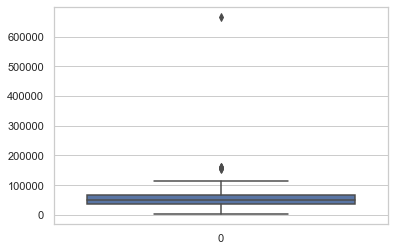

In [16]:
sns.boxplot(data=df_drop['Income'])

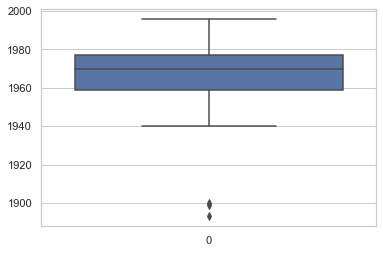

In [17]:
sns.boxplot(data=df_drop['Year_Birth'])

In [18]:
mean = np.mean(df_drop['Income'], axis=0)
sd = np.std(df_drop['Income'], axis=0)

In [19]:
li = mean - 2*sd
ls = mean + 2*sd

In [20]:
for x in df_drop['Income']:
    if (x < li):
        print(x)

1730.0


In [21]:
for x in df_drop['Income']:
    if (x > ls):
        print(x)

157243.0
102692.0
162397.0
105471.0
153924.0
160803.0
157733.0
157146.0
113734.0
156924.0
666666.0


In [22]:
mean_yb = np.mean(df_drop['Year_Birth'], axis=0)
sd_yb = np.std(df_drop['Year_Birth'], axis=0)

In [23]:
li_yb = mean_yb - 2*sd_yb

In [24]:
for x in df_drop['Year_Birth']:
    if (x < li_yb):
        print(x)

1943
1900
1893
1899
1943
1943
1941
1944
1944
1944
1944
1944
1943
1943
1944
1944
1943
1940


> Vemos que existe um valor `666666.0` muito discrepante na amostra, iremos considera-lo um outlier e remover da amostra

> Também, oservasse que existe 3 individus que nasceram antes de 1900, `1900` `1893` `1899`. Optei por retirar eles da amostra.

##### remover outliers

In [25]:
mask2=(df_drop['Income'] == 666666.0)
mask3=(df_drop['Year_Birth'] == 1893)
mask4=(df_drop['Year_Birth'] == 1900)
mask5=(df_drop['Year_Birth'] == 1899)

df_drop=df_drop.loc[~mask2]
df_drop=df_drop.loc[~mask3]
df_drop=df_drop.loc[~mask4]
df_drop=df_drop.loc[~mask5]

df_drop.shape

(2208, 39)

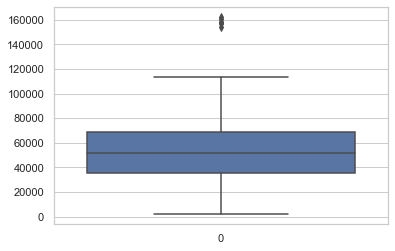

In [26]:
sns.boxplot(data=df_drop['Income'])

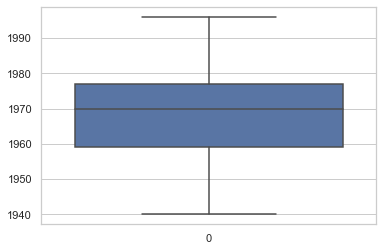

In [27]:
sns.boxplot(data=df_drop['Year_Birth'])

> Ainda parece haver outliers, porém irei mante-los na amostra, pois são outliers factíveis

## Segmentation

##### criar variável `total_spent`

In [28]:
df_drop['total_spent'] = df_drop['MntWines'] + df_drop['MntFruits'] + df_drop['MntMeatProducts'] + df_drop['MntFishProducts'] + df_drop['MntSweetProducts'] + df_drop['MntGoldProds']

##### criar variável `total_purchases`

In [29]:
df_drop['total_purchases'] = df_drop['NumDealsPurchases'] + df_drop['NumWebPurchases'] + df_drop['NumCatalogPurchases'] + df_drop['NumStorePurchases']

##### criar variável `filhos`

In [72]:
df_drop['filhos'] = df_drop['Teenhome']+df_drop['Kidhome']

count    2208.00000
mean        0.94837
std         0.74960
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         3.00000
Name: filhos, dtype: float64

##### criando variaveis padronizadas pelo Z-Score

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
df_drop.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       '2n_Cycle', 'Basic', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'total_spent',
       'total_purchases'],
      dtype='object')

In [73]:
df_drop['z_Income'] = scaler.fit_transform(df_drop['Income'].values.reshape(-1, 1))
df_drop['z_spent'] = scaler.fit_transform(df_drop['total_spent'].values.reshape(-1, 1))
df_drop['z_purchases'] = scaler.fit_transform(df_drop['total_purchases'].values.reshape(-1, 1))
df_drop['z_WebVisits'] = scaler.fit_transform(df_drop['NumWebVisitsMonth'].values.reshape(-1, 1))
df_drop['z_Recency'] = scaler.fit_transform(df_drop['Recency'].values.reshape(-1, 1))
df_drop['z_MntWines'] = scaler.fit_transform(df_drop['MntWines'].values.reshape(-1, 1))
df_drop['z_MntFruits'] = scaler.fit_transform(df_drop['MntFruits'].values.reshape(-1, 1))
df_drop['z_MntMeat'] = scaler.fit_transform(df_drop['MntMeatProducts'].values.reshape(-1, 1))
df_drop['z_MntFish'] = scaler.fit_transform(df_drop['MntFishProducts'].values.reshape(-1, 1))
df_drop['z_MntSweet'] = scaler.fit_transform(df_drop['MntSweetProducts'].values.reshape(-1, 1))
df_drop['z_MntGoldProds'] = scaler.fit_transform(df_drop['MntGoldProds'].values.reshape(-1, 1))
df_drop['z_NumDealsPurchases'] = scaler.fit_transform(df_drop['NumDealsPurchases'].values.reshape(-1, 1))
df_drop['z_NumWebPurchases'] = scaler.fit_transform(df_drop['NumWebPurchases'].values.reshape(-1, 1))
df_drop['z_NumCatalogPurchases'] = scaler.fit_transform(df_drop['NumCatalogPurchases'].values.reshape(-1, 1))
df_drop['z_NumStorePurchases'] = scaler.fit_transform(df_drop['NumStorePurchases'].values.reshape(-1, 1))
df_drop['z_filhos'] = scaler.fit_transform(df_drop['filhos'].values.reshape(-1, 1))
df_drop['z_Year_Birth'] = scaler.fit_transform(df_drop['Year_Birth'].values.reshape(-1, 1))

##### scatter plot

In [34]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

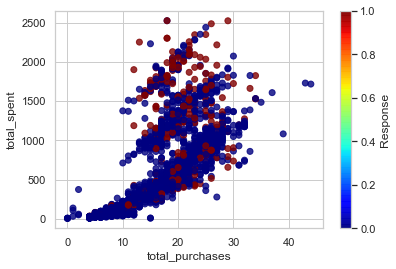

In [35]:
# Original
plt.figure()
plt.scatter(df_drop['total_purchases'], df_drop['total_spent'], c=df_drop['Response'], cmap='jet', alpha=0.8)
plt.xlabel('total_purchases')
plt.ylabel('total_spent')
plt.colorbar(label='Response')

Text(30.361800000000002, 0.5, 'z_Income')

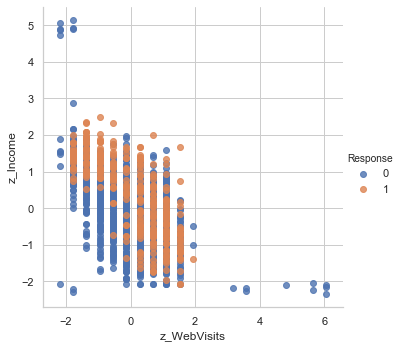

In [36]:
# Z Score
sns.lmplot( x="z_WebVisits", y="z_Income", data=df_drop, fit_reg=False, hue='Response', legend=True)
plt.xlabel('z_WebVisits')
plt.ylabel('z_Income') 

##### Análise de quatile

In [38]:
from sklearn.preprocessing import KBinsDiscretizer

In [39]:
# Criando variável discretizer com 10 intervalos, encode ordinal e estratégia quantile
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    
#Discretizando a variável Income
discretizer.fit(df_drop[["z_Income"]])
    
#Retorno: quantos indivíduos se encontram acima do percentil 90    
len(df_drop.query('z_Income > @discretizer.bin_edges_[0][9]'))

221

In [40]:
radar = ['Income', 'total_spent', 'total_purchases', 'Recency','NumWebVisitsMonth']
indv_90 = df_drop.query('z_Income > @discretizer.bin_edges_[0][9]').mean()
indv_90[radar]

Income               87974.895928
total_spent           1511.325792
total_purchases         20.859729
Recency                 49.877828
NumWebVisitsMonth        2.330317
dtype: float64

In [41]:
indv_medio = df_drop.query('z_Income >= @discretizer.bin_edges_[0][5]').mean()
indv_medio[radar]

Income               69807.252717
total_spent           1057.970109
total_purchases         20.265399
Recency                 49.161232
NumWebVisitsMonth        3.974638
dtype: float64

In [42]:
indv_max = df_drop.max()
indv_max[radar]

Income               162397
total_spent            2525
total_purchases          44
Recency                  99
NumWebVisitsMonth        20
dtype: object

In [43]:
indv_med_por = (indv_medio[radar]/indv_max[radar]) * 100
indv_med_por

Income               42.9856
total_spent          41.8998
total_purchases      46.0577
Recency              49.6578
NumWebVisitsMonth    19.8732
dtype: object

In [44]:
indv_90_por = (indv_90[radar]/indv_max[radar]) * 100
indv_90_por

Income               54.1727
total_spent          59.8545
total_purchases      47.4085
Recency              50.3816
NumWebVisitsMonth    11.6516
dtype: object

In [51]:
indv_renda_max = df_drop.query('z_Income >= @discretizer.bin_edges_[0][10]').max()
indv_renda_max_por = (indv_renda_max[radar]/indv_max[radar]) * 100
indv_renda_max_por[radar]

Income                   100
total_spent          4.23762
total_purchases      2.27273
Recency              31.3131
NumWebVisitsMonth          5
dtype: object

> Existem 222 indivíduos acima do percentil 90, o que equivalem a 10 % da amostra

> O indivíduo com a menor renda, no percentil 90, tem uma renda de 79823 por ano, é casado, possui graduação, nasceu em 1959

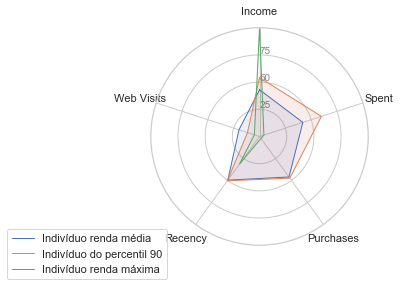

In [52]:
from math import pi

# Set data
df = pd.DataFrame({
'group': ['indv_med','indv_90','indv_renda_max'],
'Income': [42.9856, 54.1727,100],
'Spent': [41.8998, 59.8545,4.23762],
'Purchases': [46.0577, 47.4085,2.27273],
'Recency': [49.6578, 50.3816,31.3131],
'Web Visits': [19.8732, 11.6516,5]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=10)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Indivíduo renda média")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Indivíduo do percentil 90")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Indivíduo renda máxima")
ax.fill(angles, values, 'y', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

#### Análise descritiva

In [74]:
df_drop.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       '2n_Cycle', 'Basic', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'total_spent',
       'total_purchases', 'z_Income', 'z_spent', 'z_purchases', 'z_WebVisits',
       'z_Recency', 'z_MntWines', 'z_MntFruits', 'z_MntMeat', 'z_MntFish',
       'z_MntSweet', 'z_MntGoldProds', 'z_NumDealsPurchases',
       'z_NumWebPurchases', 'z_NumCatalogPurchases', 'z_NumStorePurchases',
       'z_Kidhome', 'z_Teenhome', 'z_Year_Birth', 'filhos', 'z_filhos'],
   

In [76]:
estatis = ['Year_Birth','Education', 'Marital_Status','Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Response',
       '2n_Cycle', 'Basic', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'total_spent',
       'total_purchases','filhos']
df_estatis = df_drop[estatis]

In [205]:
df_estatis['Response'].sum()

331

In [55]:
df_estatis.groupby('Response').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,total_spent,total_purchases
Response,,,,,,,,,,,,,,,,,,,,,
0,1968.814598,50489.689931,0.459776,0.541289,51.484816,270.305274,24.260522,144.430474,35.085242,25.064465,...,0.513053,0.164092,0.201385,0.097496,0.404369,0.194992,0.272243,0.030900,539.935535,14.391050
1,1969.413897,60187.752266,0.344411,0.305136,35.293051,503.256798,37.851964,295.012085,51.374622,38.410876,...,0.456193,0.169184,0.302115,0.145015,0.296073,0.323263,0.181269,0.054381,986.661631,17.676737


Text(0.5, 1.0, 'Distribution of Response')

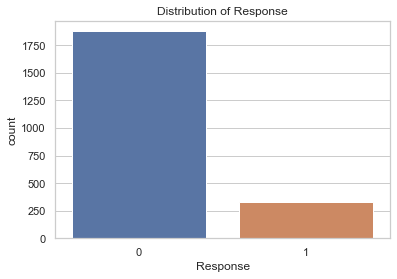

In [206]:
sns.countplot(x='Response', data=df_drop);
plt.title('Distribution of Response')

<function matplotlib.pyplot.show(*args, **kw)>

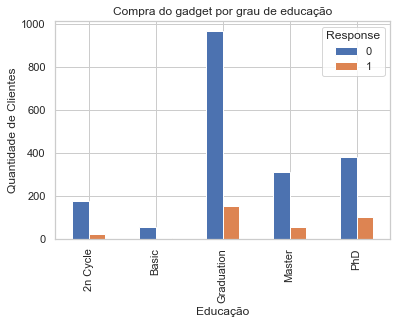

In [227]:
pd.crosstab(df_estatis.Education,df_estatis.Response).plot(kind='bar')
plt.title('Compra do gadget por grau de educação')
plt.xlabel('Educação')
plt.ylabel('Quantidade de Clientes')

#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

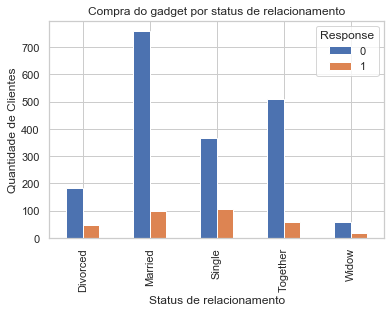

In [228]:
pd.crosstab(df_estatis.Marital_Status,df_estatis.Response).plot(kind='bar')
plt.title('Compra do gadget por status de relacionamento')
plt.xlabel('Status de relacionamento')
plt.ylabel('Quantidade de Clientes')
plt.show

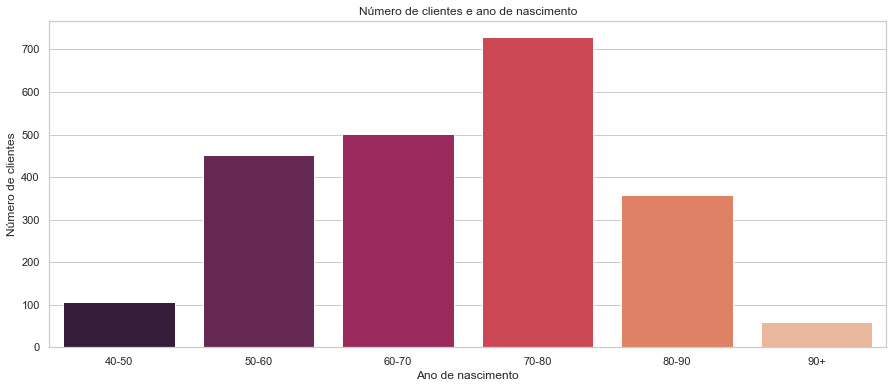

In [98]:
age40_50 = df_estatis.Year_Birth[(df_estatis.Year_Birth < 1950) & (df_estatis.Year_Birth >= 1940)]
age50_60 = df_estatis.Year_Birth[(df_estatis.Year_Birth < 1960) & (df_estatis.Year_Birth >= 1950)]
age60_70 = df_estatis.Year_Birth[(df_estatis.Year_Birth < 1970) & (df_estatis.Year_Birth >= 1960)]
age70_80 = df_estatis.Year_Birth[(df_estatis.Year_Birth < 1980) & (df_estatis.Year_Birth >= 1970)]
age80_90 = df_estatis.Year_Birth[(df_estatis.Year_Birth < 1990) & (df_estatis.Year_Birth >= 1980)]
age90above = df_estatis.Year_Birth[df_estatis.Year_Birth >= 1990]

x_ano = ["40-50","50-60","60-70","70-80","80-90", "90+"]
y_ano = [len(age40_50.values),len(age50_60.values),len(age60_70.values),len(age70_80.values),len(age80_90.values),len(age90above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_ano, y=y_ano, palette="rocket")
plt.title("Quantidade de clientes e ano de nascimento")
plt.xlabel("Ano de nascimento")
plt.ylabel("Qunatidade de clientes")
plt.show()

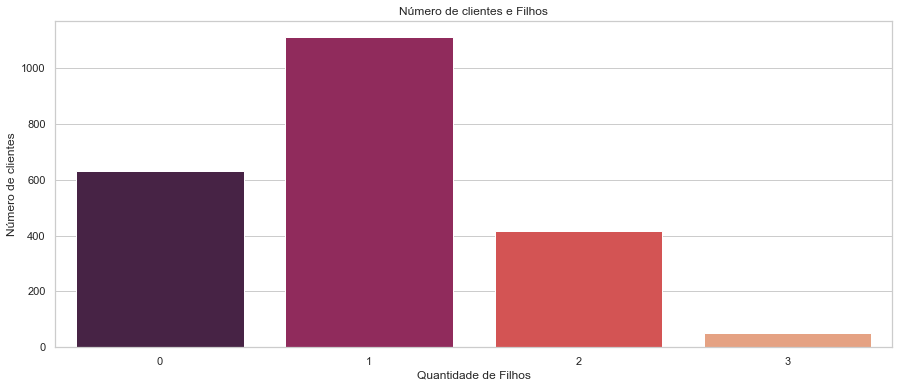

In [97]:
kid0 = df_estatis.filhos[(df_estatis.filhos == 0)]
kid1 = df_estatis.filhos[(df_estatis.filhos == 1)]
kid2 = df_estatis.filhos[(df_estatis.filhos == 2)]
kid3 = df_estatis.filhos[(df_estatis.filhos == 3)]

x_kid = ["0","1","2","3"]
y_kid = [len(kid0.values),len(kid1.values),len(kid2.values),len(kid3.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_kid, y=y_kid, palette="rocket")
plt.title("Número de clientes e Filhos")
plt.xlabel("Quantidade de Filhos")
plt.ylabel("Número de clientes")
plt.show()

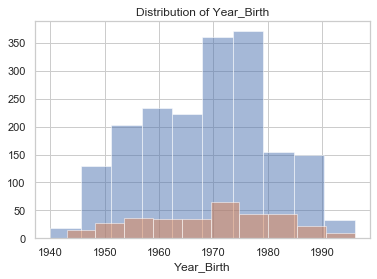

In [101]:
plt.hist('Year_Birth', data=df_drop[df_drop['Response'] == 0], alpha=0.5, label='Não');
plt.hist('Year_Birth', data=df_drop[df_drop['Response'] == 1], alpha=0.5, label='Sim');
plt.title('Distribution of Year_Birth');
plt.xlabel('Year_Birth');

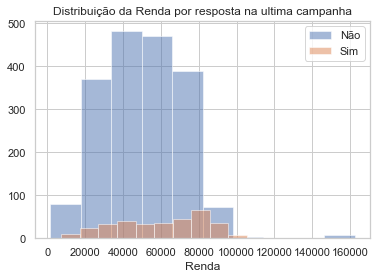

In [232]:
# Histogram of income by resposta
plt.hist('Income', data=df_drop[df_drop['Response'] == 0], alpha=0.5, label='Não');
plt.hist('Income', data=df_drop[df_drop['Response'] == 1], alpha=0.5, label='Sim');
plt.title('Distribuição da Renda por resposta na ultima campanha');
plt.xlabel('Renda');
plt.legend();

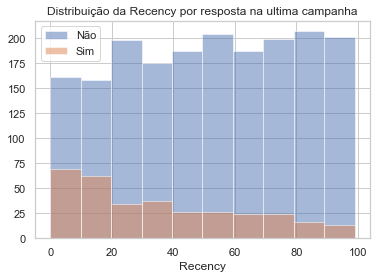

In [231]:
# Histogram of recency by resposta
plt.hist('Recency', data=df_drop[df_drop['Response'] == 0], alpha=0.5, label='Não');
plt.hist('Recency', data=df_drop[df_drop['Response'] == 1], alpha=0.5, label='Sim');
plt.title('Distribuição da Recency por resposta na ultima campanha');
plt.xlabel('Recency');
plt.legend();

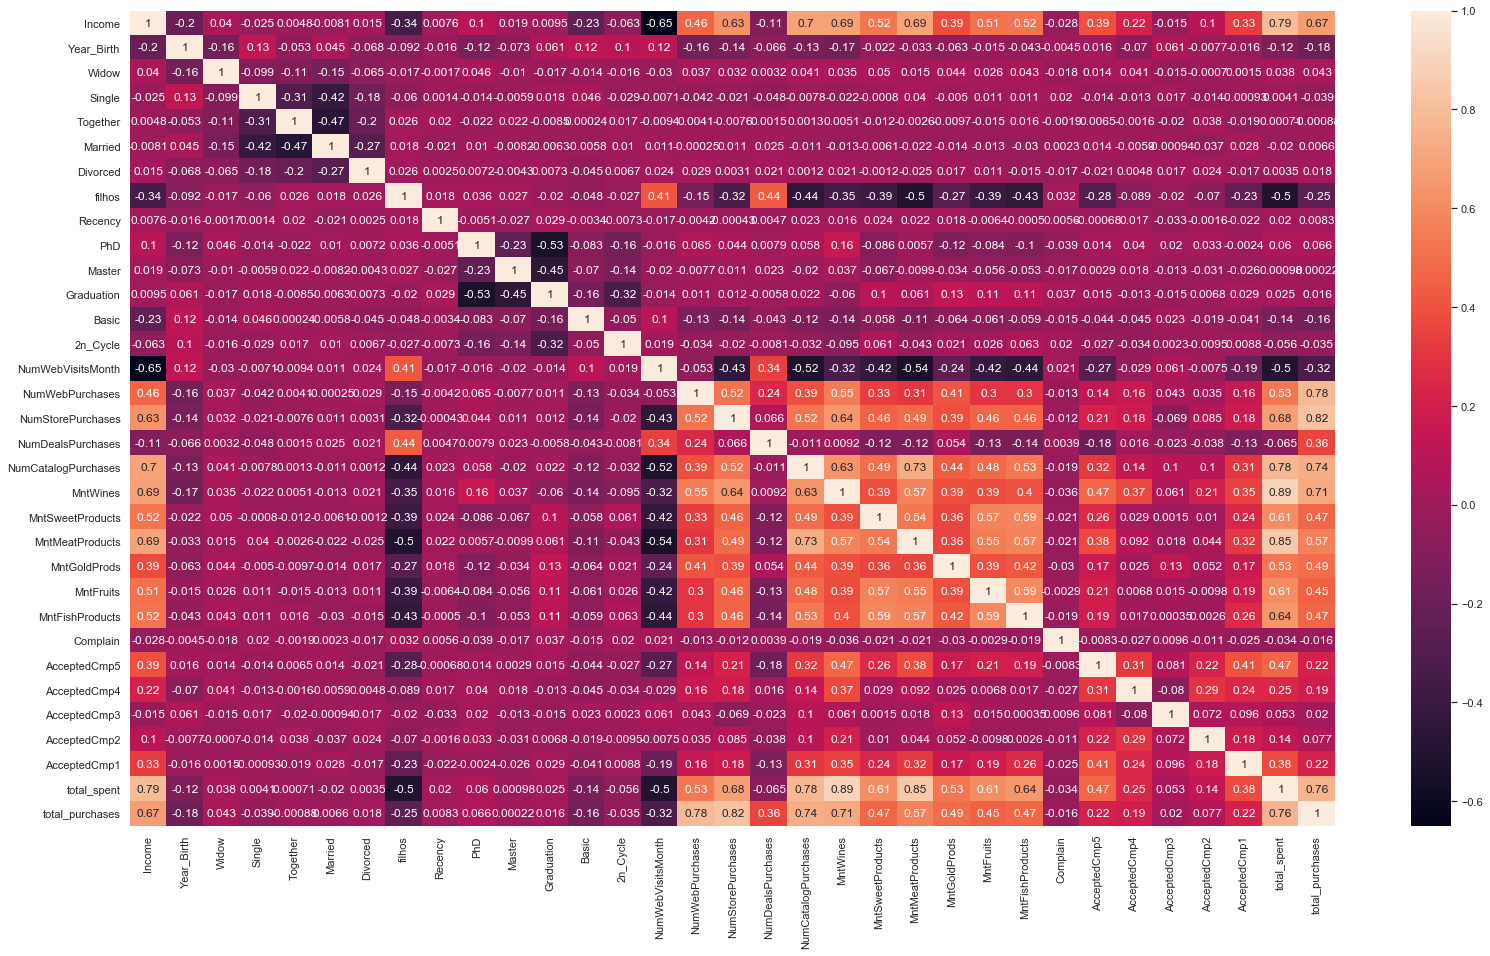

In [115]:
plt.figure(figsize=(27,15))
sns.heatmap(df_drop[var_intere].corr(), annot=True)

### Criar dataframe só com os que compraram o gadget (sucesso)

In [103]:
# dataframe só os sucessos
df_sucesso = df_drop[df_drop['Response']==1]

In [80]:
#Dataframe auxiliar na análise
df_sucesso_aux = pd.DataFrame({'Type': df_sucesso.dtypes,
                      'Missing': df_sucesso.isna().sum(),
                      'Size': df_sucesso.shape[0],
                       'Unique': df_sucesso.nunique(),
                     })
df_sucesso_aux

,Type,Missing,Size,Unique
ID,int64,0,331,331
Year_Birth,int64,0,331,54
Education,object,0,331,5
Marital_Status,object,0,331,5
Income,float64,0,331,306
...,...,...,...,...
z_Kidhome,float64,0,331,3
z_Teenhome,float64,0,331,3
z_Year_Birth,float64,0,331,54
filhos,int64,0,331,4


In [110]:
# estatistica descritiva
var_intere=['Income','Year_Birth','Widow','Single','Together','Married','Divorced','filhos','Recency','PhD',
            'Master','Graduation','Basic','2n_Cycle','NumWebVisitsMonth','NumWebPurchases','NumStorePurchases',
            'NumDealsPurchases','NumCatalogPurchases','MntWines','MntSweetProducts','MntMeatProducts','MntGoldProds','MntFruits',
            'MntFishProducts','Complain','AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','total_spent',
            'total_purchases']
esta_desc_su = pd.DataFrame({'Mean': np.around(df_sucesso[var_intere].mean(),2),
                        'Máximo': df_sucesso[var_intere].max(),
                        'Minimo': df_sucesso[var_intere].min(),
                        'Desvio Padrão': np.around(df_sucesso[var_intere].std(),2)
                     })
esta_desc_su.to_excel(r'esta_desc_su.xlsx', index = True)
esta_desc_su

,Mean,Máximo,Minimo,Desvio Padrão
Income,60187.75,105471.0,7500.0,23231.60
Year_Birth,1969.41,1996.0,1943.0,12.30
Widow,0.05,1.0,0.0,0.23
Single,0.32,1.0,0.0,0.47
Together,0.18,1.0,0.0,0.39
Married,0.30,1.0,0.0,0.46
Divorced,0.15,1.0,0.0,0.35
filhos,0.65,3.0,0.0,0.74
Recency,35.29,99.0,0.0,27.61
PhD,0.30,1.0,0.0,0.46


##### Observações sobre a amostra que comprou o Gadget
> Somente 1 % da amostra reclamou dos serviços nos ultimos 2 anos;

> A Segunda camapanha de Marketing obteve o menor sucesso, com apenas 6 %, enquanto que a melhor foi a Quinta campanha com 27 % de compras;

> 46 % da amostra possui graduação;

> A renda média de quem compra os gadgets é de aproximadamente 61 mil por ano;

> A média da amostra nasceu em 1970;

> A média de número de dias sem realizar alguma compra na loja, para esta amostra, foi de aproximadamente 36 dias.

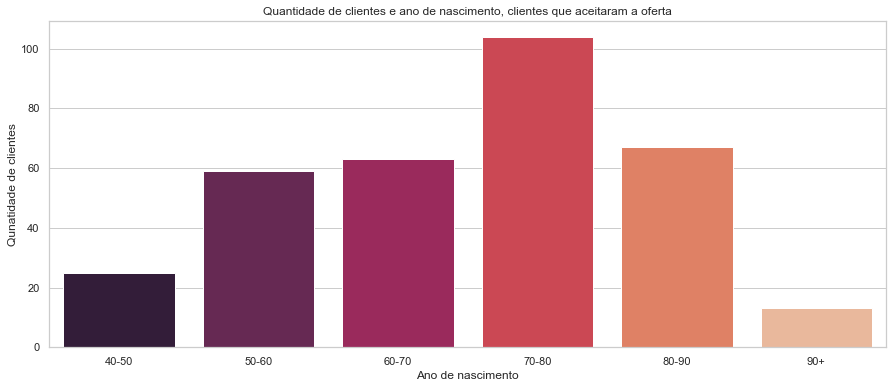

In [229]:
age40_50 = df_sucesso.Year_Birth[(df_sucesso.Year_Birth < 1950) & (df_sucesso.Year_Birth >= 1940)]
age50_60 = df_sucesso.Year_Birth[(df_sucesso.Year_Birth < 1960) & (df_sucesso.Year_Birth >= 1950)]
age60_70 = df_sucesso.Year_Birth[(df_sucesso.Year_Birth < 1970) & (df_sucesso.Year_Birth >= 1960)]
age70_80 = df_sucesso.Year_Birth[(df_sucesso.Year_Birth < 1980) & (df_sucesso.Year_Birth >= 1970)]
age80_90 = df_sucesso.Year_Birth[(df_sucesso.Year_Birth < 1990) & (df_sucesso.Year_Birth >= 1980)]
age90above = df_sucesso.Year_Birth[df_sucesso.Year_Birth >= 1990]

x_ano = ["40-50","50-60","60-70","70-80","80-90", "90+"]
y_ano = [len(age40_50.values),len(age50_60.values),len(age60_70.values),len(age70_80.values),len(age80_90.values),len(age90above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_ano, y=y_ano, palette="rocket")
plt.title("Quantidade de clientes e ano de nascimento, clientes que aceitaram a oferta")
plt.xlabel("Ano de nascimento")
plt.ylabel("Qunatidade de clientes")
plt.show()

### Criar dataframe só com os que não compraram o gadget (insucesso)

In [107]:
# dataframe só os insucessos
df_insucesso = df_drop[df_drop['Response']==0]

In [109]:
# estatistica descritiva
var_intere=['Income','Year_Birth','Widow','Single','Together','Married','Divorced','filhos','Recency','PhD',
            'Master','Graduation','Basic','2n_Cycle','NumWebVisitsMonth','NumWebPurchases','NumStorePurchases',
            'NumDealsPurchases','NumCatalogPurchases','MntWines','MntSweetProducts','MntMeatProducts','MntGoldProds','MntFruits',
            'MntFishProducts','Complain','AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','total_spent',
            'total_purchases']
esta_desc_insu = pd.DataFrame({'Mean': np.around(df_insucesso[var_intere].mean(),2),
                        'Máximo': df_insucesso[var_intere].max(),
                        'Minimo': df_insucesso[var_intere].min(),
                        'Desvio Padrão': np.around(df_insucesso[var_intere].std(),2)
                     })
esta_desc_insu.to_excel(r'esta_desc_insu.xlsx', index = True)
esta_desc_insu

,Mean,Máximo,Minimo,Desvio Padrão
Income,50489.69,162397.0,1730.0,20895.58
Year_Birth,1968.81,1996.0,1940.0,11.59
Widow,0.03,1.0,0.0,0.17
Single,0.19,1.0,0.0,0.40
Together,0.27,1.0,0.0,0.45
Married,0.40,1.0,0.0,0.49
Divorced,0.10,1.0,0.0,0.30
filhos,1.00,3.0,0.0,0.74
Recency,51.48,99.0,0.0,28.49
PhD,0.20,1.0,0.0,0.40


In [239]:
df_insucesso['ID'].describe()

count     1877.000000
mean      5617.409164
std       3262.427088
min          0.000000
25%       2831.000000
50%       5527.000000
75%       8461.000000
max      11191.000000
Name: ID, dtype: float64

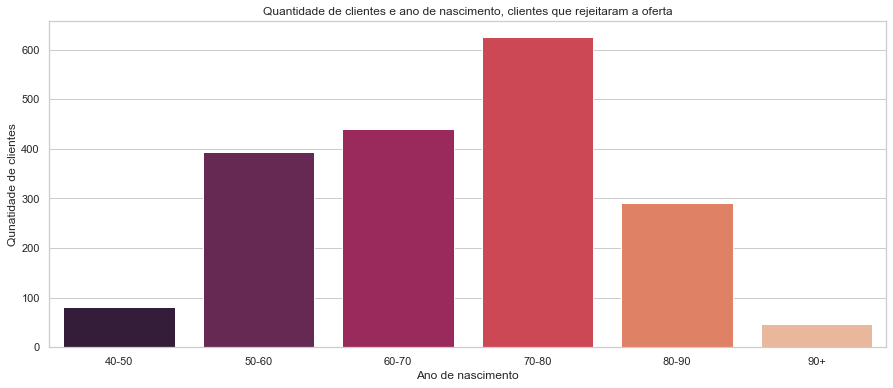

In [230]:
age40_50 = df_insucesso.Year_Birth[(df_insucesso.Year_Birth < 1950) & (df_insucesso.Year_Birth >= 1940)]
age50_60 = df_insucesso.Year_Birth[(df_insucesso.Year_Birth < 1960) & (df_insucesso.Year_Birth >= 1950)]
age60_70 = df_insucesso.Year_Birth[(df_insucesso.Year_Birth < 1970) & (df_insucesso.Year_Birth >= 1960)]
age70_80 = df_insucesso.Year_Birth[(df_insucesso.Year_Birth < 1980) & (df_insucesso.Year_Birth >= 1970)]
age80_90 = df_insucesso.Year_Birth[(df_insucesso.Year_Birth < 1990) & (df_insucesso.Year_Birth >= 1980)]
age90above = df_insucesso.Year_Birth[df_insucesso.Year_Birth >= 1990]

x_ano = ["40-50","50-60","60-70","70-80","80-90", "90+"]
y_ano = [len(age40_50.values),len(age50_60.values),len(age60_70.values),len(age70_80.values),len(age80_90.values),len(age90above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_ano, y=y_ano, palette="rocket")
plt.title("Quantidade de clientes e ano de nascimento, clientes que rejeitaram a oferta")
plt.xlabel("Ano de nascimento")
plt.ylabel("Qunatidade de clientes")
plt.show()

## Segmentation

### RPS (Recency, Purchases, Spent)

In [121]:
df_rps = df_drop[['ID','Recency','total_purchases','total_spent','Income']]
df_rps = df_rps.sort_values('total_spent', ascending=False)
df_rps.head()

,ID,Recency,total_purchases,total_spent,Income
1572,5350,29,18,2525,90638.0
1179,5735,29,18,2525,90638.0
1492,1763,62,29,2524,87679.0
987,4580,46,26,2486,75759.0
1052,4475,82,25,2440,69098.0


In [123]:
# We will use the 80% quantile for each feature
quantiles = df_rps.quantile(q=[0.8])
print(quantiles)
df_rps['R']=np.where(df_rps['Recency']<=int(quantiles.Recency.values), 2, 1)
df_rps['P']=np.where(df_rps['total_purchases']>=int(quantiles.total_purchases.values), 2, 1)
df_rps['S']=np.where(df_rps['total_spent']>=int(quantiles.total_spent.values), 2, 1)
df_rps.head()

         ID  Recency  total_purchases  total_spent   Income    R
0.8  9046.4     79.0             22.0       1174.0  71760.0  2.0


,ID,Recency,total_purchases,total_spent,Income,R,P,S
1572,5350,29,18,2525,90638.0,2,1,2
1179,5735,29,18,2525,90638.0,2,1,2
1492,1763,62,29,2524,87679.0,2,2,2
987,4580,46,26,2486,75759.0,2,2,2
1052,4475,82,25,2440,69098.0,1,2,2


In [145]:
# To do the 2 x 2 matrix we will only use Recency & Spent
df_rps['RPScore'] = df_rps.S.map(str)+df_rps.R.map(str)
df_rps = df_rps.reset_index()
df_rps_sum = df_rps.groupby('RPScore').agg({'ID': lambda y: len(y.unique()),
                                        'total_purchases': lambda y: round(y.mean(),0),
                                        'Recency': lambda y: round(y.mean(),0),
                                        'R': lambda y: round(y.mean(),0),
                                        'S': lambda y: round(y.mean(),0),
                                        'total_spent': lambda y: round(y.mean(),0)})
df_rps_sum = df_rps_sum.sort_values('RPScore', ascending=False)
df_rps_sum.head()

ValueError: cannot insert level_0, already exists

In [137]:
# 1) Average Spent Matrix
df_rps_s = df_rps_sum.pivot(index='S', columns='R', values='total_spent')
df_rps_s= df_rps_s.reset_index().sort_values(['S'], ascending = False).set_index(['S'])
df_rps_s.to_excel(r'df_rps_spent.xlsx', index = True)
df_rps_s

R,1,2
S,,
2,1621,1575
1,355,362


In [138]:
# 2) Number of Customer Matrix
df_rps_C = df_rps_sum.pivot(index='S', columns='R', values='ID')
df_rps_C= df_rps_C.reset_index().sort_values(['S'], ascending = False).set_index(['S'])
df_rps_C.to_excel(r'df_rps_Customers.xlsx', index = True)
df_rps_C

R,1,2
S,,
2,87,357
1,350,1414


In [133]:
# 3) Recency Matrix
df_rps_R = df_rps_sum.pivot(index='S', columns='R', values='Recency')
df_rps_R= df_rps_R.reset_index().sort_values(['S'], ascending = False).set_index(['S'])
df_rps_R.to_excel(r'df_rps_Recency.xlsx', index = True)
df_rps_R

R,1,2
S,,
2,90,40
1,89,39


### Modelo K-Means para clusterizar em grupos

In [149]:
#3 Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [150]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2208 non-null   int64         
 1   Year_Birth             2208 non-null   int64         
 2   Education              2208 non-null   object        
 3   Marital_Status         2208 non-null   object        
 4   Income                 2208 non-null   float64       
 5   Kidhome                2208 non-null   int64         
 6   Teenhome               2208 non-null   int64         
 7   Dt_Customer            2208 non-null   datetime64[ns]
 8   Recency                2208 non-null   int64         
 9   MntWines               2208 non-null   int64         
 10  MntFruits              2208 non-null   int64         
 11  MntMeatProducts        2208 non-null   int64         
 12  MntFishProducts        2208 non-null   int64         
 13  Mnt

In [153]:
X=df_drop.iloc[:,[42,45,43]]
X.head()

,z_spent,z_Recency,z_purchases
0,1.676120,0.309118,1.318232
1,-0.962274,-0.382230,-1.157591
2,0.280592,-0.797039,0.797006
3,-0.919130,-0.797039,-0.896978
4,-0.306824,1.553545,0.536393


In [154]:
X=X.values
X

array([[ 1.67611998,  0.30911849,  1.31823153],
       [-0.96227353, -0.38222983, -1.15759106],
       [ 0.28059234, -0.79703882,  0.79700572],
       ...,
       [ 1.05219799,  1.44984323,  0.53639282],
       [ 0.39176993, -1.41925232,  1.05761862],
       [-0.72166531, -0.313095  , -0.5060588 ]])

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.67611998,  0.30911849,  1.31823153],
       [-0.96227353, -0.38222983, -1.15759106],
       [ 0.28059234, -0.79703882,  0.79700572],
       ...,
       [ 1.05219799,  1.44984323,  0.53639282],
       [ 0.39176993, -1.41925232,  1.05761862],
       [-0.72166531, -0.313095  , -0.5060588 ]])

In [156]:
cluster_range = range(1,11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [157]:
clusters_df = pd.DataFrame( { 'num_clusters':cluster_range,
                            'cluster_errors': cluster_errors })
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,6624.000000
1,2,3528.705706
2,3,2581.722738
3,4,1876.270172
4,5,1581.779532
5,6,1371.959881
6,7,1220.253488
7,8,1081.190087
8,9,986.147675
9,10,906.412781


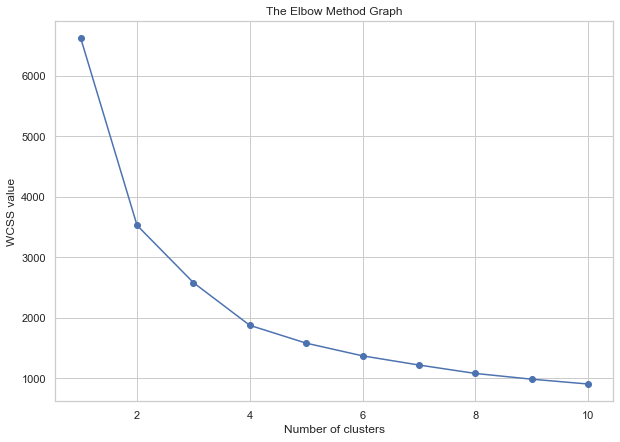

In [158]:
#4.Plot the elbow graph
plt.figure(figsize=(10,7))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.show()

In [191]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
y_kmeans

array([0, 1, 2, ..., 0, 2, 1])

In [192]:
centers = kmeans.cluster_centers_
centers

array([[ 0.90522064,  0.83212735,  0.86288556],
       [-0.79394645, -0.85019274, -0.81250814],
       [ 0.8635954 , -0.88986129,  0.91744834],
       [-0.78204477,  0.8871995 , -0.77009481]])

In [193]:
from mpl_toolkits.mplot3d import Axes3D

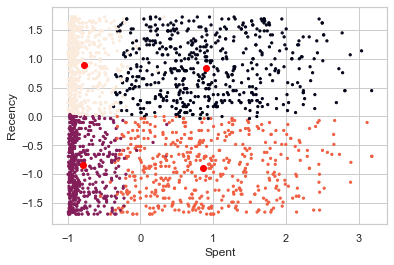

In [203]:
#fig = plt.figure(figsize=(20,10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=1)
plt.xlabel('Spent')
plt.ylabel('Recency')
plt.show()

In [197]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 1])

## Recursive Feature Elimination (RFE), verificando a relevância das variáveis

In [245]:
from sklearn.feature_selection import RFE
from yellowbrick.features import FeatureImportances

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


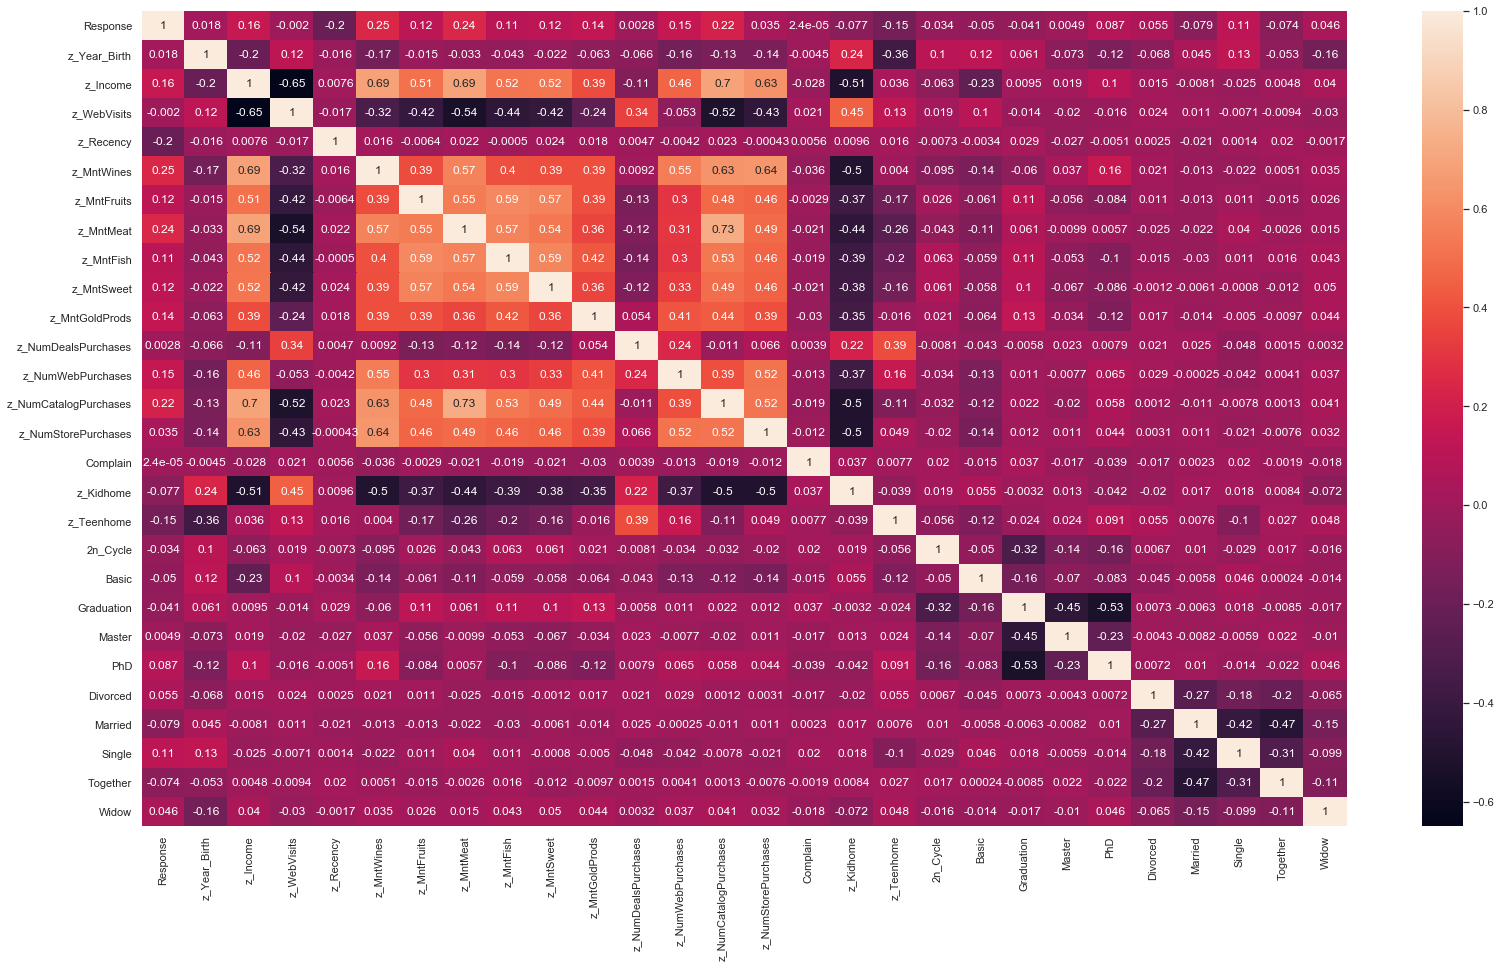

In [242]:
plt.figure(figsize=(27,15))
sns.heatmap(df_drop[final].corr(), annot=True)

In [280]:
df_drop.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       '2n_Cycle', 'Basic', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'total_spent',
       'total_purchases', 'log_Income', 'log_spent', 'log_purchases',
       'log_WebVisits', 'log_Recency', 'z_Income', 'z_spent', 'z_purchases',
       'z_WebVisits', 'z_Recency', 'z_MntWines', 'z_MntFruits', 'z_MntMeat',
       'z_MntFish', 'z_MntSweet', 'z_MntGoldProds', 'z_NumDealsPurchases',
       'z_NumWebPurchases', 'z_NumCatalogPurchases', 'z_NumStorePurch

In [241]:
final = ['Response', 'z_Year_Birth', 'z_Income', 'z_WebVisits', 'z_Recency', 'z_MntWines', 'z_MntFruits', 
         'z_MntMeat','z_MntFish', 'z_MntSweet', 'z_MntGoldProds', 'z_NumDealsPurchases','z_NumWebPurchases',
         'z_NumCatalogPurchases', 'z_NumStorePurchases', 'Complain','z_Kidhome', 'z_Teenhome','2n_Cycle', 
         'Basic', 'Graduation', 'Master', 'PhD', 'Divorced','Married', 'Single', 'Together', 'Widow']
df_final = df_drop[final]

In [246]:
X = df_final.drop(columns = ['Response'])
y = df_final['Response']

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Eduardo\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


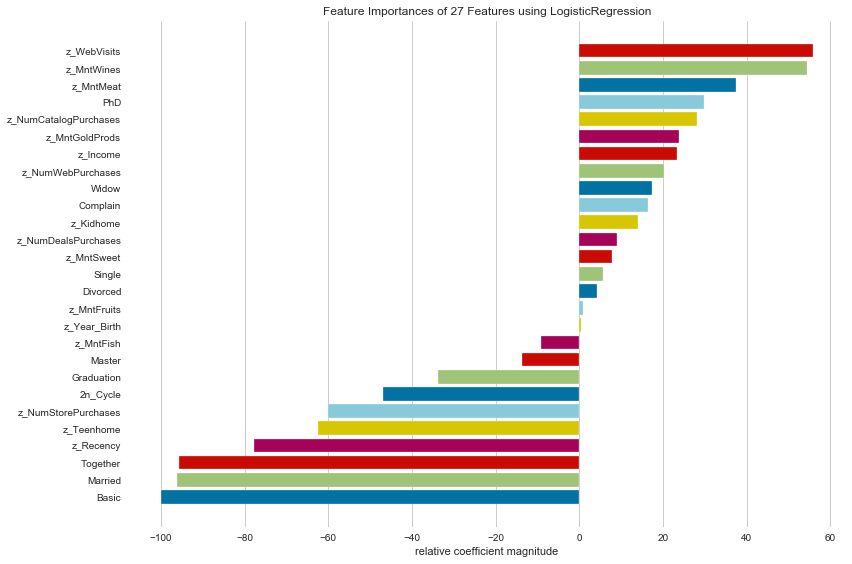

In [247]:
# Gráfico :
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# Layout:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Plot:
viz = FeatureImportances(LogisticRegression(solver='liblinear', random_state=0), ax=ax)
viz.fit(X, y)
viz.poof();

> observamos que as variáveis `ID`, `Year_Birth`, `z_MntFruits` e `Complain` não possuem um efeito muito grande na variavel `Response`

## Aplicando modelos de Machine Learning para prever os clientes que vão comprar o gadget

> Utilizarei 3 modelos para prever a resposta dos consumidores:

   > Regressão Logistica;
    
   > Random Forest;
    
   > Decision Tree.

#### Dividindo em amostra de treino e de teste

In [248]:
from sklearn.model_selection import train_test_split

In [258]:
X = df_final.drop(columns = ['Response','z_Year_Birth','z_MntFruits'])
y = df_final['Response']

In [249]:
y = df_drop['Response']
y.shape

(2208,)

In [354]:
features = ['z_Income', 'z_WebVisits', 'z_Recency', 'z_MntWines', 
         'z_MntMeat','z_MntFish', 'z_MntSweet', 'z_MntGoldProds', 'z_NumDealsPurchases','z_NumWebPurchases',
         'z_NumCatalogPurchases', 'z_NumStorePurchases', 'Complain','z_Kidhome', 'z_Teenhome','2n_Cycle', 
         'Basic', 'Graduation', 'Master', 'PhD', 'Divorced','Married', 'Single', 'Together', 'Widow']
x = df_drop[features]
x.shape

(2208, 25)

In [259]:
x_train, x_test, y_train, y_test = train_test_split(X, y) # 75% para treino e 25% para teste

In [260]:
y_train.shape

(1656,)

In [261]:
y_test.shape

(552,)

In [266]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

##### salvar resultados do desempenho

In [312]:
mae = []
roc = []
score_train = []
score_test = []

### Modelo de regressão logistica

In [262]:
logit = LogisticRegression(solver='liblinear', random_state=0)
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
y_pred_test_logit = logit.predict(x_test)
y_prob_test_logit = logit.predict_proba(x_test)[:, 1]
y_pred_train_logit = logit.predict(x_train)
y_prob_train_logit = logit.predict_proba(x_test)[:, 1]

In [324]:
from sklearn.metrics import mean_absolute_error
mae_logit = mean_absolute_error(y_test, y_pred_test_logit)
mae.append(mae_logit)
print('MAE:', mean_absolute_error(y_test, y_pred_test_logit))

MAE: 0.11413043478260869


In [331]:
# Calculate roc auc
roc_value_logit = roc_auc_score(y_test, y_prob_test_logit)
roc.append(roc_value_logit)
roc_value_logit

0.8521429379169966

In [269]:
confusion_matrix(y_test, y_pred_test_logit)

array([[465,  13],
       [ 50,  24]], dtype=int64)

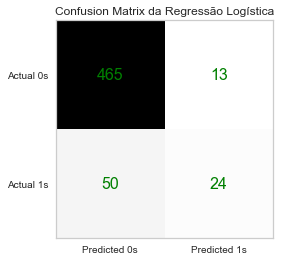

In [341]:
cm_logit = confusion_matrix(y_test, y_pred_test_logit)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_logit)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
plt.title('Confusion Matrix da Regressão Logística')
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_logit[i, j], ha='center', va='center', color='green')
plt.show()

In [313]:
score_train_logit = logit.score(x_train, y_train)
score_train.append(score_train_logit)
score_train_logit

0.8659420289855072

In [314]:
score_test_logit = logit.score(x_test, y_test)
score_test.append(score_test_logit)
score_test_logit

0.8858695652173914

#### Random Forest

In [278]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [279]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator para usar no random search
estimator = RandomForestClassifier()

# random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1)

# Fit 
rs.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [280]:
rs.best_params_ # mostra quais são os melhores parametros para o Random Forest

{'n_estimators': 130,
 'min_samples_split': 5,
 'max_leaf_nodes': 35,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [283]:
forest = RandomForestClassifier(n_estimators= 130,
                                min_samples_split= 5,
                                max_leaf_nodes= 35,
                                max_features= 'auto',
                                max_depth= 18,
                                bootstrap= True)

In [284]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=35, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [285]:
y_pred_test_forest = forest.predict(x_test)
y_prob_test_forest = forest.predict_proba(x_test)[:, 1]
y_pred_train_forest = forest.predict(x_train)
y_prob_train_forest = forest.predict_proba(x_train)[:, 1]

In [332]:
# Calculate roc auc test
roc_value_test_forest = roc_auc_score(y_test, y_prob_test_forest)
roc.append(roc_value_test_forest)
roc_value_test_forest

0.8672113536130273

In [287]:
# Calculate roc auc train
roc_value_train_forest = roc_auc_score(y_train, y_prob_train_forest)
roc_value_train_forest

0.9633465260066252

In [288]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.08 Train: 0.35
Precision Baseline: 0.13 Test: 0.67 Train: 0.99
Roc Baseline: 0.5 Test: 0.87 Train: 0.96


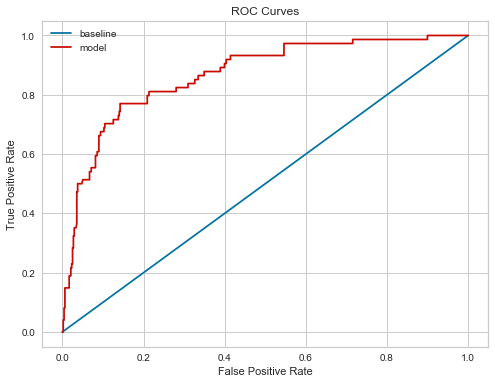

In [291]:
evaluate_model(y_pred_test_forest, y_prob_test_forest, y_pred_train_forest, y_prob_train_forest)
plt.show()

In [323]:
mae_forest = mean_absolute_error(y_test, y_pred_test_forest)
mae.append(mae_forest)

print('MAE:', mean_absolute_error(y_test, y_pred_test_forest))

MAE: 0.1286231884057971


In [316]:
score_train_forest = forest.score(x_train, y_train)
score_train.append(score_train_forest)
score_train_forest

0.8991545893719807

In [318]:
score_test_forest= forest.score(x_test, y_test)
score_test.append(score_test_forest)
score_test_forest

0.8713768115942029

In [295]:
confusion_matrix(y_test, y_pred_test_forest)

array([[475,   3],
       [ 68,   6]], dtype=int64)

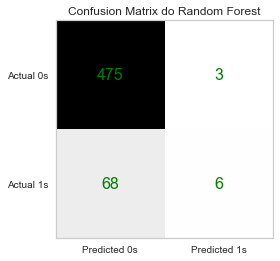

In [342]:
cm_forest = confusion_matrix(y_test, y_pred_test_forest)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_forest)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_forest[i, j], ha='center', va='center', color='green')
plt.title('Confusion Matrix do Random Forest')
plt.show()

#### Decision Tree

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
tree = DecisionTreeClassifier()

In [299]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [300]:
y_pred_test_tree = tree.predict(x_test)
y_prob_test_tree = tree.predict_proba(x_test)[:, 1]

y_pred_train_tree = tree.predict(x_train)
y_prob_train_tree = tree.predict_proba(x_test)[:, 1]

In [322]:
mae_tree = mean_absolute_error(y_test, y_pred_test_tree)
mae.append(mae_tree)
                
print('MAE:', mean_absolute_error(y_test, y_pred_test_tree))

MAE: 0.18115942028985507


In [320]:
score_train_tree = tree.score(x_train, y_train)
score_train.append(score_train_tree)
score_train_tree

0.9933574879227053

In [319]:
score_test_tree = tree.score(x_test, y_test)
score_test.append(score_test_tree)
score_test_tree

0.8188405797101449

In [333]:
# Calculate roc auc test
roc_value_test_tree = roc_auc_score(y_test, y_prob_test_tree)
roc.append(roc_value_test_tree)
roc_value_test_tree

0.683209883523691

In [383]:
confusion_matrix(y_test, y_pred_test_tree)

array([[430,  48],
       [ 41,  33]], dtype=int64)

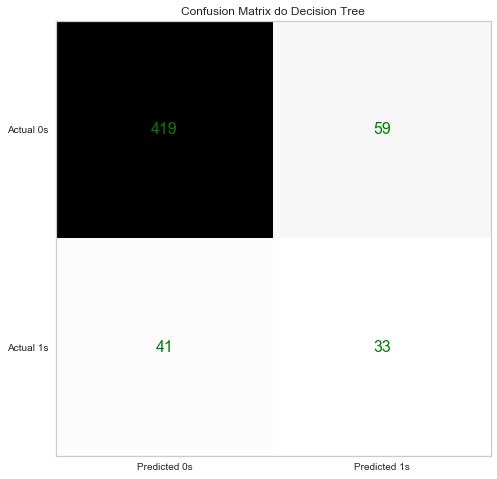

In [306]:
cm_tree = confusion_matrix(y_test, y_pred_test_tree)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_tree)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_tree[i, j], ha='center', va='center', color='green')
plt.title('Confusion Matrix do Decision Tree')
plt.show()

### Resultados

In [335]:
desempenho = pd.DataFrame({'Score Train': np.around(score_train, 2),
                        'Score Test': np.around(score_test, 2),
                        'MAE': np.around(mae, 2),
                        'ROC AUC': np.around(roc, 2)
                     })
desempenho.to_excel(r'desempenho.xlsx', index = True)
desempenho

,Score Train,Score Test,MAE,ROC AUC
0,0.87,0.89,0.18,0.85
1,0.90,0.87,0.13,0.87
2,0.99,0.82,0.11,0.68
